<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from matplotlib.ticker import FuncFormatter
from scipy.stats import t, laplace, expon, uniform, norm
import statsmodels.api as sm
import random
import pandas_datareader as pdr

In [53]:
! pip install pandas_datareader

<h2 style="color:Green;">Exploring Sector ETFs</h2><br/>

A sector exchange-traded fund (ETF) is a pooled investment vehicle that invests specifically in the stocks and securities of a particular industry or sector, typically identified in the fund's title. For instance, a sector ETF may track a representative basket of stocks from a specific economic sector.<br>
<br>
Here is the list of sector ETFs:
<ul>
  <li>Healthcare: XLV</li>
  <li>Utilities: XLU</li>
  <li>Consumer Staples: XLP</li>
  <li>Materials: XLB</li>
  <li>Financials: XLF</li>
  <li>Energy: XLE</li>
  <li>Real Estate: XLRE</li>
  <li>Information Technology: XLK</li>
  <li>Consumer Discretionary: XLY</li>
  <li>Communication Services: XLC</li>
  <li>Industrials: XLI</li>
</ul>

In [54]:
ETF_SYMBOLS = ['XLV','XLU','XLP','XLB','XLF','XLE','XLRE','XLK','XLY','XLI','XLC'] # Enter the ticker symbols here
TAU = 5         # Enter duration of data you want from Yahoo Finance
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
etfPxList = pdr.DataReader(ETF_SYMBOLS, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
etfLogRetList = np.log(etfPxList).diff().dropna()
sum_stats = pd.DataFrame({'mean':etfLogRetList.mean(), 'sd': etfLogRetList.std(), 'skewness':etfLogRetList.skew(), 'excess kurtosis':etfLogRetList.kurtosis()})
sum_stats

,mean,sd,skewness,excess kurtosis
Symbols,,,,
XLV,0.000486,0.012567,-0.430119,10.590089
XLU,0.000447,0.014525,-0.259035,17.788300
XLP,0.000453,0.011285,-0.526279,16.293630
XLB,0.000284,0.015736,-0.613286,9.886552
XLF,0.000228,0.017677,-0.595470,13.544938
XLE,0.000123,0.024177,-0.943489,13.569118
XLRE,0.000385,0.015605,-1.504062,20.688146
XLK,0.000646,0.017874,-0.574166,9.010947
XLY,0.000293,0.016120,-0.992643,9.278624


Since the criteria for a good stock is higher mean, lower standard deviation, closer to 0 skewness, and a positive excess kurtosis, the two best sector ETFs would be XLK and XLU, since they have greater mean returns and a relatively smaller standard deviation with a closer to 0 skewness.

In [55]:
sum_stats = pd.DataFrame({'mean':etfLogRetList.mean(), 'sd': etfLogRetList.std(), 'skewness':etfLogRetList.skew(), 'excess kurtosis':etfLogRetList.kurtosis(), 'Reward to Risk':etfLogRetList.mean()/etfLogRetList.std()})
sum_stats

,mean,sd,skewness,excess kurtosis,Reward to Risk
Symbols,,,,,
XLV,0.000486,0.012567,-0.430119,10.590089,0.038692
XLU,0.000447,0.014525,-0.259035,17.788300,0.030758
XLP,0.000453,0.011285,-0.526279,16.293630,0.040164
XLB,0.000284,0.015736,-0.613286,9.886552,0.018030
XLF,0.000228,0.017677,-0.595470,13.544938,0.012883
XLE,0.000123,0.024177,-0.943489,13.569118,0.005096
XLRE,0.000385,0.015605,-1.504062,20.688146,0.024702
XLK,0.000646,0.017874,-0.574166,9.010947,0.036152
XLY,0.000293,0.016120,-0.992643,9.278624,0.018187


The two highest reward to risks are the XLP and XLV, making them more probable to return earnings rather than losses.

We would use a log return graph to help evaluate the ETFs before putting them into the portfilio.


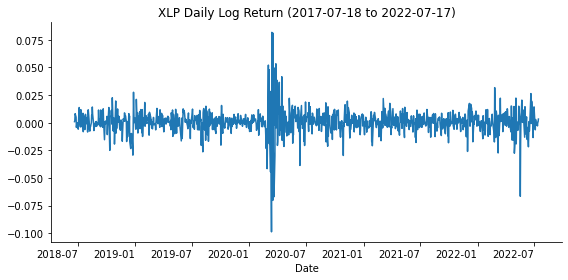

In [56]:
ax = etfLogRetList['XLP'].plot(figsize=(8, 4),
                      title=ETF_SYMBOLS[2]+' Daily Log Return '+ '(' + START_DATE + ' to ' + END_DATE + ')',
                      rot=0)
sns.despine()
plt.tight_layout();

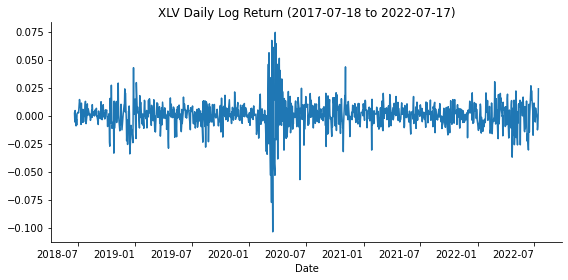

In [57]:

ax = etfLogRetList['XLV'].plot(figsize=(8, 4),
                      title=ETF_SYMBOLS[0]+' Daily Log Return '+ '(' + START_DATE + ' to ' + END_DATE + ')',
                      rot=0)
sns.despine()
plt.tight_layout();

<h2 style="color:Green;">Evaluating Portfolio Risks</h2><br/>

Lets add an asset to the previous ones, but this one needs to have lower risk.

In [58]:
ASSET_TICKER = 'AMD'     # Enter the asset's ticker here
TAU = 8             # duration span (in years) of observed data

In [59]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
# storing adjusted stock prices into a variable 
assetPx = pdr.get_data_yahoo(ASSET_TICKER, START_DATE, END_DATE)['Adj Close'] 
# converting prices to log returns and removing NaN values
assetLogRet = np.log(assetPx).diff().dropna()

Text(0, 0.5, 'Density')

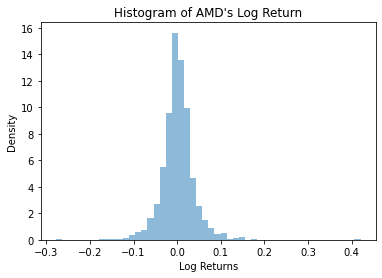

In [60]:
_, bins, _= plt.hist(assetLogRet, bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + ASSET_TICKER + "'s Log Return")
plt.xlabel("Log Returns"); plt.ylabel("Density")

The mean is very close to 0, meaning the stock has many fluctuations but the earnings always balance out with the losses. The standard deviation is also very similar, however there is ever so slightly more on the loss side compared to the earn side. Finally the shape is very close to a student-t distribution.

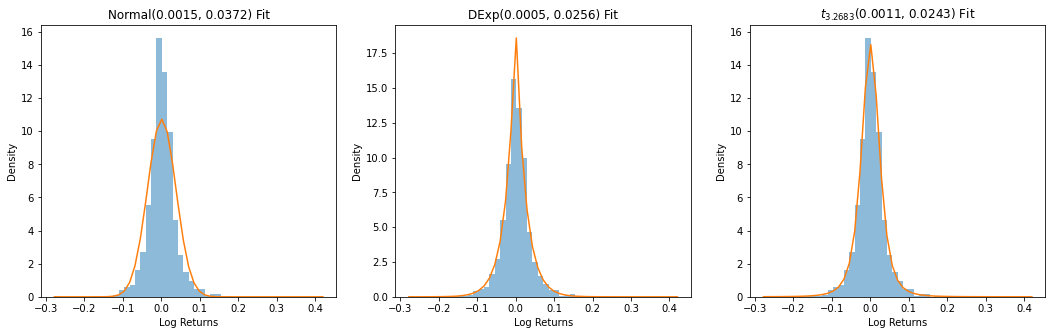

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# storing histogram bins and plotting the first histogram
_, bins, _ = axs[0].hist(assetLogRet, bins=50, density=1, alpha=0.5)

#---------------------------w/ Normal PDF-----------------------------
mu, sigma = stats.norm.fit(assetLogRet)
axs[0].plot(bins, stats.norm.pdf(bins, mu, sigma), label='normal pdf')
axs[0].set_title("Normal("+str(np.round(mu, 4))+', '+str(np.round(sigma, 4))+") Fit")

#---------------------------w/ Double Exponential PDF-----------------------------
axs[1].hist(assetLogRet, bins=50, density=1, alpha=0.5)
loc_dexp, scale_dexp = stats.laplace.fit(assetLogRet)
axs[1].plot(bins, laplace.pdf(bins, loc_dexp, scale_dexp), label='double exponential pdf')
axs[1].set_title("DExp("+str(np.round(loc_dexp, 4))+', '+str(np.round(scale_dexp, 4))+") Fit")

#---------------------------w/ Student-t PDF-----------------------------
axs[2].hist(assetLogRet, bins=50, density=1, alpha=0.5)
df_t, loc_t, scale_t = stats.t.fit(assetLogRet)
axs[2].plot(bins, t.pdf(bins, df_t, loc_t, scale_t), label='student-t pdf')
axs[2].set_title("$t_{"+str(np.round(df_t, 4))+"}$"+"("+str(np.round(loc_t, 4))+', '+str(np.round(scale_t, 4))+") Fit")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns', ylabel='Density')

The probability distribution that fits its best is the student-t distribution. It covers the peak accurately and the tails are also accurately matched. The location of the graph is centered around 0. The scale is 1/0.0242 = 41.322.

Text(0.5, 1.0, "Student-t QQ Plot of AMD's Log Return")

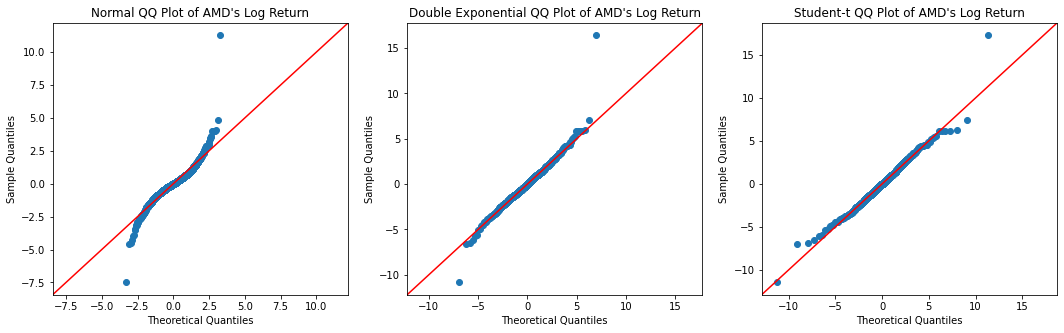

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#---------------------------w/ Normal QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.norm, fit=True, line='45', ax=axs[0])
axs[0].set_title("Normal QQ Plot of " + ASSET_TICKER + "'s Log Return")

#---------------------------w/ Double Exponential QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.laplace, fit=True, line='45', ax=axs[1])
axs[1].set_title("Double Exponential QQ Plot of " + ASSET_TICKER + "'s Log Return")

#---------------------------w/ Student-t QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.t, fit=True, line='45', ax=axs[2])
axs[2].set_title("Student-t QQ Plot of " + ASSET_TICKER + "'s Log Return")

Actually, I think the double exponential here is more accurate than the student-t distribution, since it has more points on the center line. The student-t one overestimates the smaller values and underestimates the larger values, making it slightly less accurate. This is not the same as the previous answer, which is quite interesting to me. 

Here are the three different plots and some statistics about them.

In [63]:
quantile_10 = norm.ppf(0.1, mu, sigma)
quantile_5 = norm.ppf(0.05, mu, sigma)
quantile_1 = norm.ppf(0.01, mu, sigma)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(norm.rvs(loc = mu, scale = sigma, size = 10000000))-1)      # enter code before this comment

In [64]:
quantile_10 = laplace.ppf(0.1, loc_dexp, scale_dexp)
quantile_5 = laplace.ppf(0.05, loc_dexp, scale_dexp)
quantile_1 = laplace.ppf(0.01, loc_dexp, scale_dexp)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(laplace.rvs(loc = loc_dexp, scale = scale_dexp, size = 10000000))-1)      # enter code before this comment

In [65]:
quantile_10 = t.ppf(0.1, df_t, loc_t, scale_t)
quantile_5 = t.ppf(0.05, df_t, loc_t, scale_t)
quantile_1 = t.ppf(0.01, df_t, loc_t, scale_t)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(t.rvs(df = df_t, loc = loc_t, scale = scale_t, size = 10000000))-1)      

This gives the relative Value-at-Risk for each one (rVAR)

In [66]:
rVaR_10 = -(np.exp(quantile_10)-1)     
rVaR_5 = -(np.exp(quantile_5)-1)     
rVaR_1 = -(np.exp(quantile_1)-1)    
rVaR = [rVaR_10, rVaR_5, rVaR_1] 

This gives the Relative Shortfall (RS)

In [67]:
rES_10 = np.mean(simLoss[simLoss>rVaR_10])   
rES_5 = np.mean(simLoss[simLoss>rVaR_5])      
rES_1 = np.mean(simLoss[simLoss>rVaR_1])      
rES = [rES_10, rES_5, rES_1] 

In [68]:
pd.DataFrame({'Significance Level': ['10%', '5%', '1%'], 'Quantile': [quantile_10, quantile_5, quantile_1], 'rVaR': [rVaR_10, rVaR_5, rVaR_1], 'rES':[rES_10, rES_5, rES_1]})

,Significance Level,Quantile,rVaR,rES
0,10%,-0.037816,0.037110,0.063131
1,5%,-0.054186,0.052744,0.082336
2,1%,-0.102215,0.097165,0.139663
